In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pylab as plt

In [5]:
results_df = pd.read_csv('results.csv')
results_df.head()

,graph,instance,algorithm,requests,robots,capacity,demand,num_instance,isBigTW,cost,time,distance,used_vehicles,used_max,used_min,used_mean,computational_time,delay,delay_cost
0,random,6HR_6Q_50RQT_2q_9,MILP,50,6,6,2,9,False,5134.0,6045.0,5094.0,4.0,2487.0,92.0,1273.50,1.560000,0.0,0.0
1,random,6HR_6Q_50RQT_2q_9,SCFI,50,6,6,2,9,False,5035.0,6045.0,4995.0,4.0,2423.0,92.0,1248.75,0.340000,0.0,0.0
2,random,6HR_6Q_50RQT_2q_9,MCFI,50,6,6,2,9,False,5134.0,6045.0,5094.0,4.0,2519.0,92.0,1273.50,0.655200,0.0,0.0
3,random,6HR_6Q_50RQT_2q_9,WS-MILP,50,6,6,2,9,False,5134.0,6045.0,5094.0,4.0,2519.0,92.0,1273.50,14.010037,0.0,0.0
4,random,6HR_6Q_50RQT_2q_5,MILP,50,6,6,2,5,False,5816.0,6202.0,5796.0,2.0,4963.0,833.0,2898.00,1.820000,0.0,0.0


In [ ]:
REQUESTS = 50

tw_map = {
    False: "narrow",
    True: "wide"
}

alg_order = ['SCFI', 'MCFI', 'MILP', 'WS-MILP']

results_df['isInvalid'] = results_df['cost'].isna()
results_df['isDelayed'] = results_df['delay'] > 0

## All results

In [7]:
# Pipeline simplificado
mean_time_cost_df = (
    results_df
    # Filtrar filas relevantes y crear isInvalid
    .loc[results_df['algorithm'].isin(["SCFI", "MCFI", "MILP", "WS-MILP"]) ]
    .assign(
        #isInvalid=lambda d: d['cost'].isna(),
        #isDelayed=lambda d: d['delay'] > 0,
        Count=lambda d: 10 - d['cost'].isna().astype(int)*10,
        iter_time=lambda d: d['computational_time'] / REQUESTS
    )
    # Seleccionar columnas relevantes
    [['graph', 'isBigTW', 'robots', 'algorithm', 'cost', 'computational_time', 'Count', 'iter_time']]
    # Agrupar y calcular la media
    .groupby(['graph', 'isBigTW', 'robots', 'algorithm'])
    .mean()
    .round(2)
    # Reestructurar para que los algoritmos sean columnas
    .unstack('algorithm')
    .swaplevel(0, 1, axis=1)
    .sort_index(axis=1, level=0)
)

# Reordenar las subcolumnas
mean_time_cost_df = mean_time_cost_df.reindex(["SCFI", "MCFI", "MILP", "WS-MILP"], axis=1, level=0)      # nivel superior = algoritmos
mean_time_cost_df = mean_time_cost_df.reindex(['cost', 'computational_time', 'iter_time', 'Count'], axis=1, level=1)   # nivel secundario = métricas

# Mostrar DataFrame
display(mean_time_cost_df)

# Exportar a LaTeX
latex_str = mean_time_cost_df.to_latex(
    caption="Benchmark results for AFVPRI-FP instances.",
    label="table:all_results",
    longtable=False,
    float_format="%10.2f"
)

# Imprimir LaTeX
print(latex_str)


algorithm                          SCFI                                     \
                                   cost computational_time iter_time Count   
graph           isBigTW robots                                               
asymmetric_grid False   3       24362.0               0.28      0.01  10.0   
                        6       14943.0               0.36      0.01  10.0   
                        9       14704.0               0.40      0.01  10.0   
                True    3       15218.0               0.27      0.01  10.0   
                        6       15057.0               0.31      0.01  10.0   
                        9       14914.0               0.39      0.01  10.0   
mountain        False   3        4532.9               0.29      0.01  10.0   
                        6        4520.2               0.34      0.01  10.0   
                        9        4464.8               0.42      0.01  10.0   
                True    3        4571.6               0.29      0.01  10.0   
                        6        4522.0               0.33      0.01  10.0   
                        9        4480.6               0.40      0.01  10.0   
random          False   3        5371.8               0.29      0.01  10.0   
                        6        5279.9               0.33      0.01  10.0   
                        9        5239.6               0.47      0.01  10.0   
                True    3        5495.5               0.29      0.01  10.0   
                        6        5386.7               0.39      0.01  10.0   
                        9        5295.4               0.43      0.01  10.0   
symmetric_grid  False   3       21768.0               0.29      0.01  10.0   
                        6       15487.0               0.32      0.01  10.0   
                        9       15155.0               0.41      0.01  10.0   
                True    3       15734.0               0.26      0.01  10.0   
                        6       15536.0               0.32      0.01  10.0   
                        9       15386.0               0.38      0.01  10.0   

algorithm                          MCFI                                     \
                                   cost computational_time iter_time Count   
graph           isBigTW robots                                               
asymmetric_grid False   3       13344.0               0.75      0.02  10.0   
                        6       13048.0               0.75      0.01  10.0   
                        9       12158.0               0.77      0.02  10.0   
                True    3       12514.0               1.08      0.02  10.0   
                        6       11320.0               1.03      0.02  10.0   
                        9       12710.0               1.07      0.02  10.0   
mountain        False   3        4474.0               0.55      0.01  10.0   
                        6        4451.4               0.61      0.01  10.0   
                        9        4413.7               0.68      0.01  10.0   
                True    3        4496.8               0.56      0.01  10.0   
                        6        4465.7               0.64      0.01  10.0   
                        9        4418.9               0.69      0.01  10.0   
random          False   3        5357.8               0.61      0.01  10.0   
                        6        5298.8               0.68      0.01  10.0   
                        9        5230.4               0.74      0.01  10.0   
                True    3        5370.0               0.65      0.01  10.0   
                        6        5313.3               0.71      0.01  10.0   
                        9        5236.6               0.77      0.02  10.0   
symmetric_grid  False   3       13419.0               0.79      0.02  10.0   
                        6       12010.0               0.77      0.02  10.0   
                        9       12186.0               0.80      0.02  10.0   
                True 

\begin{table}
\caption{Benchmark results for AFVPRI-FP instances.}
\label{table:all_results}
\begin{tabular}{lllrrrrrrrrrrrrrrrr}
\toprule
 &  & algorithm & \multicolumn{4}{r}{SCFI} & \multicolumn{4}{r}{MCFI} & \multicolumn{4}{r}{MILP} & \multicolumn{4}{r}{WS-MILP} \\
 &  &  & cost & computational_time & iter_time & Count & cost & computational_time & iter_time & Count & cost & computational_time & iter_time & Count & cost & computational_time & iter_time & Count \\
graph & isBigTW & robots &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{asymmetric_grid} & \multirow[t]{3}{*}{False} & 3 &   24362.00 &       0.28 &       0.01 &      10.00 &   13344.00 &       0.75 &       0.02 &      10.00 &   12230.00 &       5.38 &       0.11 &      10.00 &   12191.00 &      14.48 &       0.29 &      10.00 \\
 &  & 6 &   14943.00 &       0.36 &       0.01 &      10.00 &   13048.00 &       0.75 &       0.01 &      10.00 &   11433.00 &      39.20 &       0.78 &      10.00 &

## Grid results by instances

In [9]:
grid_wide_df = (
    results_df
    # Filtrar filas relevantes y crear isInvalid
    .loc[results_df['algorithm'].isin(["SCFI", "MCFI", "MILP", "WS-MILP"]) & (results_df['graph'] == "asymmetric_grid") & (results_df['isBigTW'] == True) & (results_df['robots'].between(3,9)) ]
    .assign(
        iter_time=lambda d: d['computational_time'] / REQUESTS,
        isBigTW=lambda d: d['isBigTW'].replace(tw_map)
    )
    # Seleccionar columnas relevantes
    [['instance', 'robots', 'algorithm', 'cost', 'iter_time']]
    # Agrupar y calcular la media
    .round(2)
)

grid_wide_df = (
    grid_wide_df
    .pivot_table(
        index=['instance', 'robots'],
        columns='algorithm',
        values=['cost', 'iter_time'],
        aggfunc='mean'
    )
    .round(2)
    .swaplevel(0, 1, axis=1)
    .reindex(alg_order, level=0, axis=1)
)


# Exportar a LaTeX
latex_str = grid_wide_df.to_latex(
    caption="Grid-wide Benchmark results.",
    label="table:grid_wide_results",
    multicolumn=True,
    multicolumn_format='c',
    longtable=False,
    float_format="%7.2f"
)

display(grid_wide_df)
# Imprimir LaTeX
print(latex_str)


algorithm                          SCFI               MCFI               MILP  \
                                   cost iter_time     cost iter_time     cost   
instance                robots                                                  
3HR_6Q_50RQT_2q_bigTW_0 3       13910.0      0.00  10870.0      0.02   9850.0   
3HR_6Q_50RQT_2q_bigTW_1 3       16570.0      0.01  12410.0      0.02  10970.0   
3HR_6Q_50RQT_2q_bigTW_2 3       15390.0      0.01  11770.0      0.02  10790.0   
3HR_6Q_50RQT_2q_bigTW_3 3       15350.0      0.01  12570.0      0.02  10290.0   
3HR_6Q_50RQT_2q_bigTW_4 3       15010.0      0.01  12290.0      0.02  10580.0   
3HR_6Q_50RQT_2q_bigTW_5 3       13990.0      0.00  11970.0      0.02   8850.0   
3HR_6Q_50RQT_2q_bigTW_6 3       15670.0      0.01  12670.0      0.02  10750.0   
3HR_6Q_50RQT_2q_bigTW_7 3       16210.0      0.01  13390.0      0.02  10310.0   
3HR_6Q_50RQT_2q_bigTW_8 3       14770.0      0.01  11650.0      0.02  10510.0   
3HR_6Q_50RQT_2q_bigTW_9 3       15310.0      0.01  15550.0      0.02   9620.0   
6HR_6Q_50RQT_2q_bigTW_0 6       13130.0      0.01  10480.0      0.02   9330.0   
6HR_6Q_50RQT_2q_bigTW_1 6       16050.0      0.01  12300.0      0.02   9880.0   
6HR_6Q_50RQT_2q_bigTW_2 6       14230.0      0.01  11110.0      0.02      NaN   
6HR_6Q_50RQT_2q_bigTW_3 6       15120.0      0.01  11260.0      0.02      NaN   
6HR_6Q_50RQT_2q_bigTW_4 6       15490.0      0.01  11590.0      0.02   9660.0   
6HR_6Q_50RQT_2q_bigTW_5 6       15240.0      0.01  10960.0      0.02      NaN   
6HR_6Q_50RQT_2q_bigTW_6 6       15240.0      0.01  11730.0      0.02   9510.0   
6HR_6Q_50RQT_2q_bigTW_7 6       15690.0      0.01  10640.0      0.02   9530.0   
6HR_6Q_50RQT_2q_bigTW_8 6       15000.0      0.01  11580.0      0.02      NaN   
6HR_6Q_50RQT_2q_bigTW_9 6       15380.0      0.01  11550.0      0.02   9410.0   
9HR_6Q_50RQT_2q_bigTW_0 9       13750.0      0.01  11200.0      0.02      NaN   
9HR_6Q_50RQT_2q_bigTW_1 9       16160.0      0.01  13130.0      0.02      NaN   
9HR_6Q_50RQT_2q_bigTW_2 9       15130.0      0.01  12120.0      0.02      NaN   
9HR_6Q_50RQT_2q_bigTW_3 9       14780.0      0.01  18740.0      0.02      NaN   
9HR_6Q_50RQT_2q_bigTW_4 9       15290.0      0.01  15990.0      0.02      NaN   
9HR_6Q_50RQT_2q_bigTW_5 9       13580.0      0.01  10230.0      0.02   8560.0   
9HR_6Q_50RQT_2q_bigTW_6 9       14730.0      0.01  11280.0      0.02      NaN   
9HR_6Q_50RQT_2q_bigTW_7 9       16140.0      0.01  11960.0      0.02      NaN   
9HR_6Q_50RQT_2q_bigTW_8 9       15140.0      0.01  11470.0      0.02      NaN   
9HR_6Q_50RQT_2q_bigTW_9 9       14440.0      0.01  10980.0      0.02      NaN   

algorithm                                 WS-MILP            
                               iter_time     cost iter_time  
instance                robots                               
3HR_6Q_50RQT_2q_bigTW_0 3          24.13   9870.0      4.01  
3HR_6Q_50RQT_2q_bigTW_1 3           1.96  10650.0      7.54  
3HR_6Q_50RQT_2q_bigTW_2 3           7.78  10730.0     10.48  
3HR_6Q_50RQT_2q_bigTW_3 3          18.49  10690.0     25.94  
3HR_6Q_50RQT_2q_bigTW_4 3           3.63  10100.0     10.90  
3HR_6Q_50RQT_2q_bigTW_5 3           8.59   8830.0     40.17  
3HR_6Q_50RQT_2q_bigTW_6 3           7.92  10590.0      1.60  
3HR_6Q_50RQT_2q_bigTW_7 3          24.75  10650.0     22.27  
3HR_6Q_50RQT_2q_bigTW_8 3           4.78  10770.0      9.78  
3HR_6Q_50RQT_2q_bigTW_9 3          11.89  10570.0      4.52  
6HR_6Q_50RQT_2q_bigTW_0 6         107.86   8140.0    212.86  
6HR_6Q_50RQT_2q_bigTW_1 6          79.46   9810.0    120.72  
6HR_6Q_50RQT_2q_bigTW_2 6            NaN   8940.0    118.04  
6HR_6Q_50RQT_2q_bigTW_3 6            NaN   9500.0    192.20  
6HR_6Q_50RQT_2q_bigTW_4 6         123.13  10180.0    128.87  
6HR_6Q_50RQT_2q_bigTW_5 6            NaN   8650.0    157.22  
6HR_6Q_50RQT_2q_bigTW_6 6          86.25   9230.0     75.09  
6HR_6Q_50RQT_2q_bigTW_7 6          36.96  10520.0     14.56  
6HR_6Q_50RQT_2q_bigTW_8 

\begin{table}
\caption{Grid-wide Benchmark results.}
\label{table:grid_wide_results}
\begin{tabular}{llrrrrrrrr}
\toprule
 & algorithm & \multicolumn{2}{c}{SCFI} & \multicolumn{2}{c}{MCFI} & \multicolumn{2}{c}{MILP} & \multicolumn{2}{c}{WS-MILP} \\
 &  & cost & iter_time & cost & iter_time & cost & iter_time & cost & iter_time \\
instance & robots &  &  &  &  &  &  &  &  \\
\midrule
3HR_6Q_50RQT_2q_bigTW_0 & 3 & 13910.00 &    0.00 & 10870.00 &    0.02 & 9850.00 &   24.13 & 9870.00 &    4.01 \\
\cline{1-10}
3HR_6Q_50RQT_2q_bigTW_1 & 3 & 16570.00 &    0.01 & 12410.00 &    0.02 & 10970.00 &    1.96 & 10650.00 &    7.54 \\
\cline{1-10}
3HR_6Q_50RQT_2q_bigTW_2 & 3 & 15390.00 &    0.01 & 11770.00 &    0.02 & 10790.00 &    7.78 & 10730.00 &   10.48 \\
\cline{1-10}
3HR_6Q_50RQT_2q_bigTW_3 & 3 & 15350.00 &    0.01 & 12570.00 &    0.02 & 10290.00 &   18.49 & 10690.00 &   25.94 \\
\cline{1-10}
3HR_6Q_50RQT_2q_bigTW_4 & 3 & 15010.00 &    0.01 & 12290.00 &    0.02 & 10580.00 &    3.63 & 10100.00 & 

# Asymmetric Grid

## Delay

In [11]:
delayed_df = (
    results_df
    .loc[results_df['algorithm'].isin(['MCFI', 'WS-MILP']) & (results_df['graph'] == "asymmetric_grid")]
    .assign(
        isDelayed=lambda d: d['delay'] > 0,
    )
    [['graph', 'isBigTW',  'robots', "algorithm", "isDelayed", 'delay']]
    .groupby(['graph', 'isBigTW',  'robots', "algorithm"]) 
    .agg(
            delayed_count = ('isDelayed', 'sum'),
            overall_delay = ('delay', 'sum')
        )
)
delayed_df['delay_ratio'] = np.where(
    delayed_df['overall_delay'] > 0,
    delayed_df['overall_delay'] /  delayed_df['delayed_count'],
    0
)

display(delayed_df)

delayed_count  overall_delay  \
graph           isBigTW robots algorithm                                 
asymmetric_grid False   3      MCFI                   2            8.0   
                               WS-MILP                1            1.0   
                        6      MCFI                   2          102.0   
                               WS-MILP                1            4.0   
                        9      MCFI                   0            0.0   
                               WS-MILP                1            1.0   
                True    3      MCFI                   2           90.0   
                               WS-MILP                0            0.0   
                        6      MCFI                   2            2.0   
                               WS-MILP                0            0.0   
                        9      MCFI                   2          213.0   
                               WS-MILP                1            1.0   

                                          delay_ratio  
graph           isBigTW robots algorithm               
asymmetric_grid False   3      MCFI               4.0  
                               WS-MILP            1.0  
                        6      MCFI              51.0  
                               WS-MILP            4.0  
                        9      MCFI               0.0  
                               WS-MILP            1.0  
                True    3      MCFI              45.0  
                               WS-MILP            0.0  
                        6      MCFI               1.0  
                               WS-MILP            0.0  
                        9      MCFI             106.5  
                               WS-MILP            1.0

## Time

In [12]:
time_df = (
    results_df
    .loc[
        (results_df['graph'] == "asymmetric_grid") &
        (~results_df['isInvalid']) &
        (results_df['algorithm'].isin(alg_order)),
        ['algorithm', 'robots', 'requests', 'isBigTW', 'computational_time', 'cost']
    ]
    .assign(
        time_per_request=lambda d: d['computational_time'] / d['requests'],
        label=lambda d: d.apply(
            lambda r: f"{r.robots}-{tw_map[r.isBigTW]}", axis=1
        )
    )
    [['label', 'algorithm', 'computational_time', 'time_per_request', 'cost']]
)

time_df['label'] = pd.Categorical(
    time_df['label'],
    categories=(
        # Generar lista con todos los labels ordenados por robots y TW
        ["3-narrow", "3-wide", "6-narrow", "6-wide",
         "9-narrow", "9-wide"]
    ),
    ordered=True
)

display(time_df)

,label,algorithm,computational_time,time_per_request,cost
480,6-narrow,MILP,27.120000,0.542400,11940.0
481,6-narrow,SCFI,0.330000,0.006600,15060.0
482,6-narrow,MCFI,0.783502,0.015670,13630.0
483,6-narrow,WS-MILP,43.273915,0.865478,11020.0
484,6-narrow,MILP,34.500000,0.690000,10590.0
...,...,...,...,...,...
715,9-wide,WS-MILP,11572.528047,231.450561,8170.0
716,6-narrow,MILP,48.480000,0.969600,11810.0
717,6-narrow,SCFI,0.330000,0.006600,15660.0
718,6-narrow,MCFI,0.735033,0.014701,13600.0


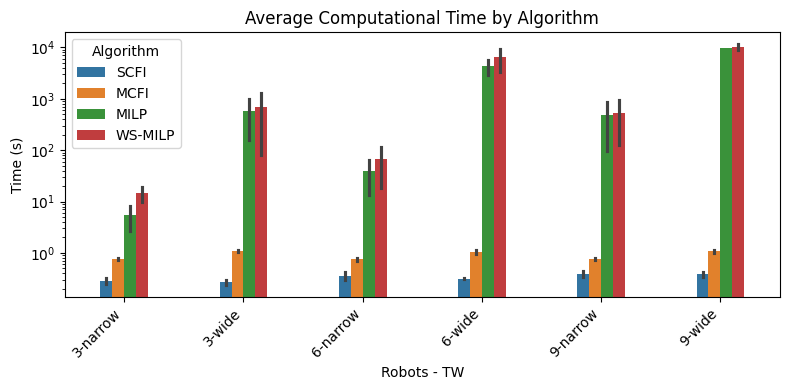

In [13]:
plt.figure(figsize=(8, 4))

sns.barplot(
    data=time_df,
    x='label',
    y='computational_time',
    hue='algorithm',
    estimator='mean',
    errorbar='sd',          
    width=0.4,
    hue_order=["SCFI", "MCFI", "MILP", "WS-MILP"]
)

plt.yscale("log")


plt.title('Average Computational Time by Algorithm')
plt.xlabel('Robots - TW')
plt.ylabel('Time (s)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

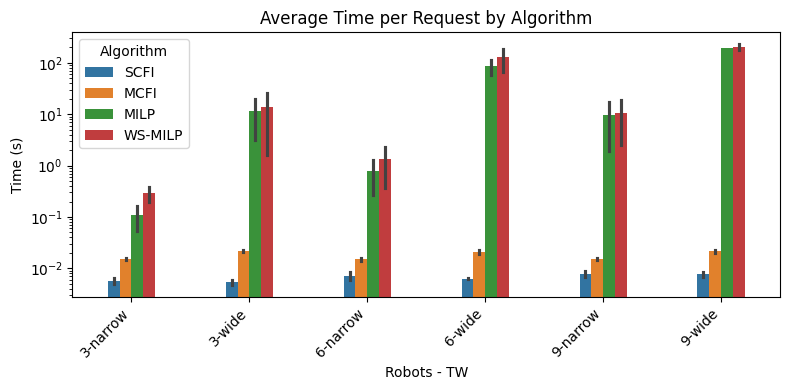

In [14]:
plt.figure(figsize=(8, 4))

sns.barplot(
    data=time_df,
    x='label',
    y='time_per_request',
    hue='algorithm',
    estimator='mean',
    errorbar='sd',          
    width=0.4,
    hue_order=["SCFI", "MCFI", "MILP", "WS-MILP"]
)

plt.yscale("log")


plt.title('Average Time per Request by Algorithm')
plt.xlabel('Robots - TW')
plt.ylabel('Time (s)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

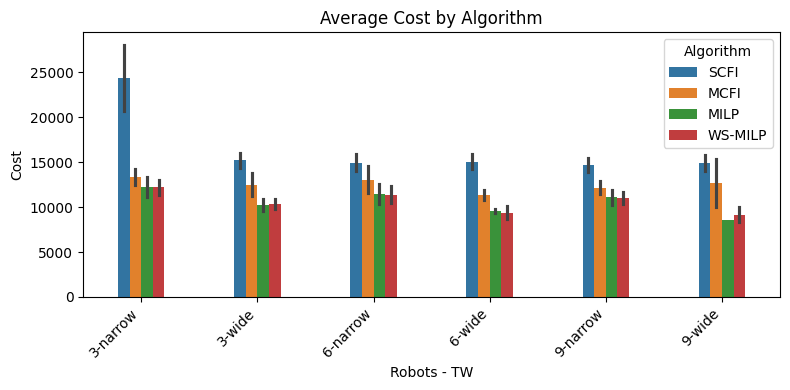

In [15]:
plt.figure(figsize=(8, 4))

sns.barplot(
    data=time_df,
    x='label',
    y='cost',
    hue='algorithm',
    estimator='mean',
    errorbar='sd',          
    width=0.4,
    hue_order=["SCFI", "MCFI", "MILP", "WS-MILP"]
)


plt.title('Average Cost by Algorithm')
plt.xlabel('Robots - TW')
plt.ylabel('Cost')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

# Overall Cost

In [16]:
# Crear columna de nombre único de instancia
results_df["instance_name"] = results_df["graph"] + "/" + results_df["instance"]

# Filtrar y pivotar los costos de ambos algoritmos
costs_df = (
    results_df[results_df['algorithm'].isin(['MCFI', 'WS-MILP'])]
    .pivot(index='instance_name', columns='algorithm', values='cost')
)

# Calcular diferencia
costs_df['diff'] = costs_df['MCFI'] - costs_df['WS-MILP']

# Contar casos
ws_better = (costs_df['diff'] > 0).sum()
upv_better = (costs_df['diff'] < 0).sum()
equal = (costs_df['diff'] == 0).sum()
total = len(costs_df)

print(f"Number of instances where WS-MILP outperforms MCFI: {ws_better} out of {total}")
print(f"Number of instances where MCFI outperforms WS-MILP: {upv_better} out of {total}")
print(f"Number of instances where both have the same cost: {equal} out of {total}")


Number of instances where WS-MILP outperforms MCFI: 122 out of 240
Number of instances where MCFI outperforms WS-MILP: 7 out of 240
Number of instances where both have the same cost: 111 out of 240


## Cost comparison

In [ ]:
# TODO